<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/randomwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling & Analyzing Random Walk Processes**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy import stats
from random import gauss
from random import seed
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import scipy
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import lag_plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Random Walks (with Drift) & Time Series**

## **Characteristics & Relevance of Random Walks**

* Random walk is another time series model where the current observation is equal to the previous observation with a random step up or down. Known as a stochastic or random process.
* y(t) = B0 + B1*X(t-1) + e(t)
* A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. It is this dependency that gives the process its name as a “random walk” or a “drunkard’s walk”. https://en.wikipedia.org/wiki/Random_walk (Geometric Brownian motion)

**Random Walk and Autocorrelation**

* We can calculate the correlation between each observation and the observations at previous time steps. Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.

**Stationarity**

* A stationary time series is one where the values are not a function of time. Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time.

* The current observation is a random step from the previous observation. Therefore we can expect a random walk to be non-stationary. In fact, all random walk processes are non-stationary. Note that not all non-stationary time series are random walks.

* Additionally, a non-stationary time series does not have a consistent mean and/or variance over time. A review of the random walk line plot might suggest this to be the case. We can confirm this using a statistical significance test, specifically the Augmented Dickey-Fuller test.

**Higher Dimensions**

* In higher dimensions, the set of randomly walked points has interesting geometric properties. In fact, one gets a discrete fractal, that is, a set which exhibits stochastic self-similarity on large scales. On small scales, one can observe “jaggedness” resulting from the grid on which the walk is performed. Two books of Lawler referenced below are a good source on this topic. The trajectory of a random walk is the collection of points visited, considered as a set with disregard to when the walk arrived at the point. In one dimension, the trajectory is simply all points between the minimum height and the maximum height the walk achieved (both are, on average, on the order of ?n).

**Prediction**

* A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. This is often called the naive forecast, or a persistence model. We can implement this in Python by first splitting the dataset into train and test sets, then using the persistence model to predict the outcome using a rolling forecast method. Once all predictions are collected for the test set, the mean squared error is calculated.

## **Random Walks & Time Series**

**Is time series a random walk?**

Your time series may be a random walk. Some ways to check if your time series is a random walk are as follows:

* The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
* The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
* The persistence model provides the best source of reliable predictions.

* This last point is key for time series forecasting. Baseline forecasts with the persistence model quickly flesh out whether you can do significantly better. If you can’t, you’re probably working with a random walk. Many time series are random walks, particularly those of security prices over time. The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted. 

* "A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable." - Page 26, A Random Walk down Wall Street: The Time-tested Strategy for Successful Investing. https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/


**Applications of Random Walks**

* In computer networks, random walks can model the number of transmission packets buffered at a server.
* In population genetics, random walk describes the statistical properties of genetic drift.
* In image segmentation, random walks are used to determine the labels (i.e., “object” or “background”) to associate with each pixel.
* In brain research, random walks and reinforced random walks are used to model cascades of neuron firing in the brain.
* Random walks have also been used to sample massive online graphs such as online social networks.

## **Create Random Walk Process**

**1D Random Walk Time Series**

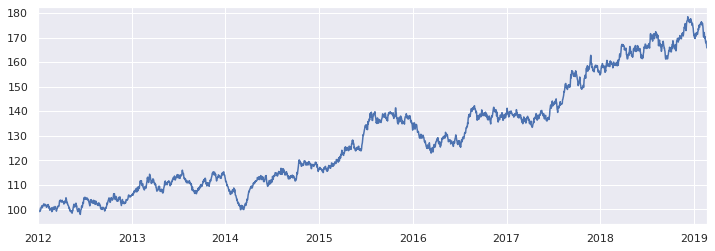

In [0]:
import numpy as np
sns.set(rc={'figure.figsize':(12, 4)})

def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20): 
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
series = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

series.plot()

**2D Random Walk**

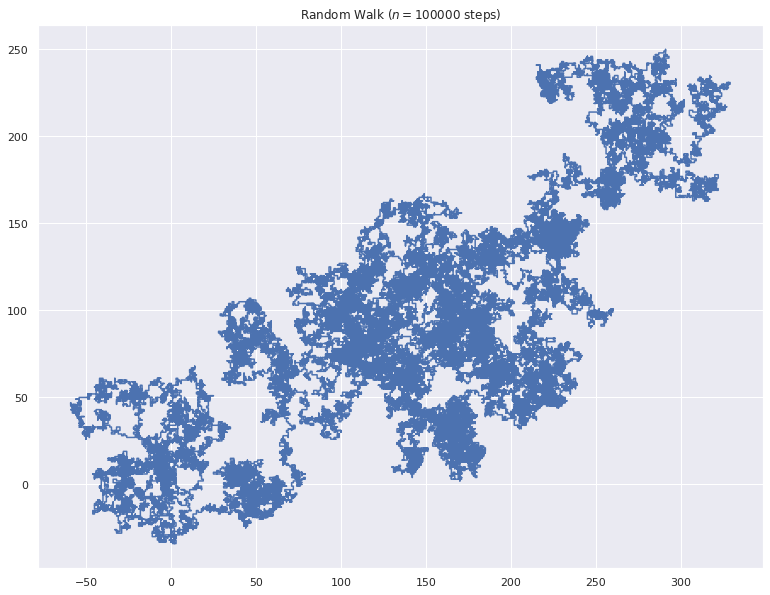

In [0]:
# Python code for 2D random walk. 
import numpy 
import pylab 
import random 
  
# defining the number of steps 
n = 100000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
# plotting stuff: 
sns.set(rc={'figure.figsize':(13, 10)})
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show() 

# **Exploratory Data Analysis**

## **Distribution**

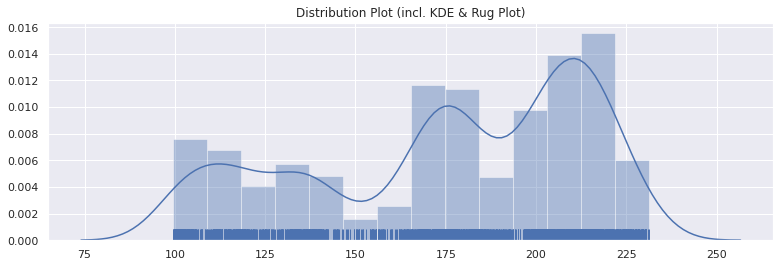

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

Text(0.5, 1.0, 'Boxplot')

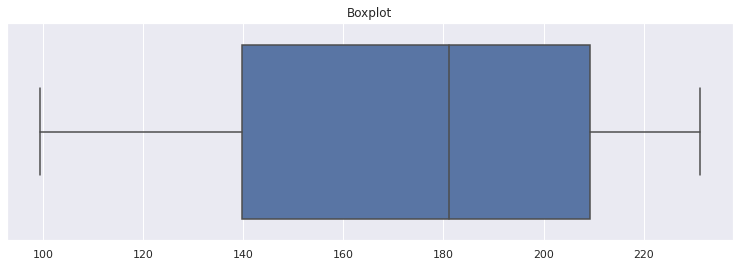

In [0]:
sns.boxplot(series).set_title('Boxplot')

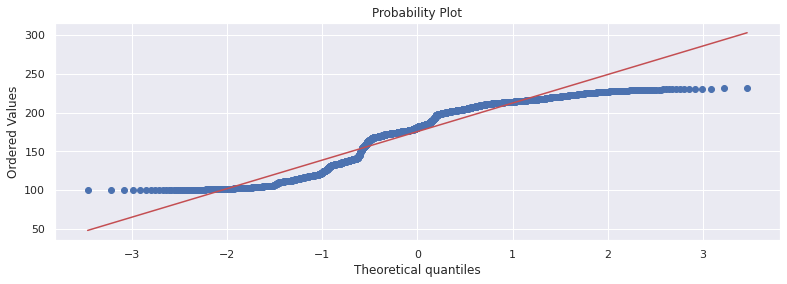

In [0]:
stats.probplot(series, dist="norm", plot=plt)
plt.show()

In [0]:
scipy.stats.normaltest(series)

NormaltestResult(statistic=1366.8167803464978, pvalue=1.5830960357407053e-297)

In [0]:
stats.shapiro(series)

(0.9383051991462708, 1.2152279406710421e-31)

In [0]:
stats.anderson(series)

AndersonResult(statistic=47.86014395685379, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## **Autocorrelation**

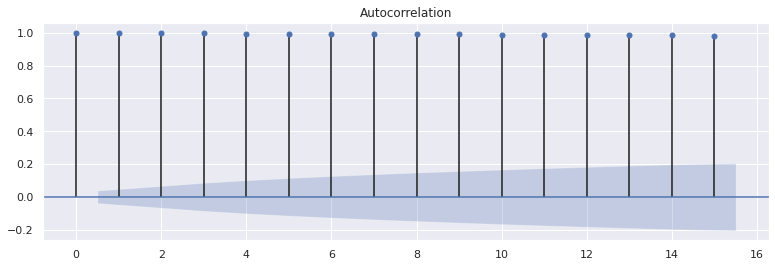

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(series.squeeze(), lags=15)
plt.show()

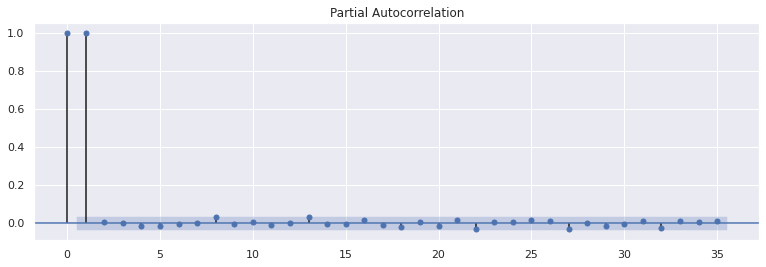

In [0]:
plot_pacf(series)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


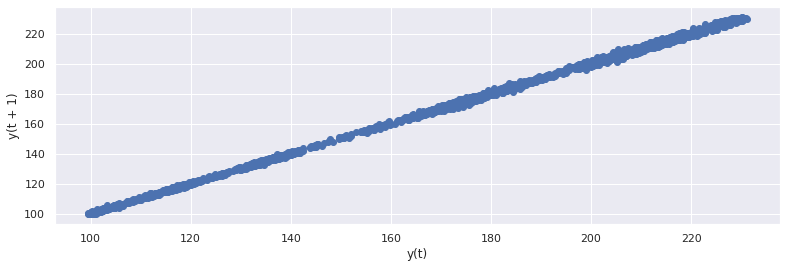

In [0]:
lag_plot(series)
plt.show()

In [0]:
statsmodels.stats.stattools.durbin_watson(series, axis=0)

2.8651139481048667e-05

In [0]:
# Ljung-Box test of autocorrelation in residuals (Lags = (#Observations/2) -2)
sm.stats.acorr_ljungbox(series, lags=[2498])

(array([2322601.21112167]), array([0.]))

In [0]:
sm.tsa.stattools.bds(series, max_dim=6, epsilon=None, distance=1.5)

(array([273.43528609, 301.62082461, 337.29707698, 387.70961376,
        456.73831201]), array([0., 0., 0., 0., 0.]))

## **Stationarity**

In [0]:
statsmodels.tsa.stattools.adfuller(series, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(4.117692196564653,
 0.9999999753688792,
 0,
 2609,
 {'1%': -2.566597489531549,
  '10%': -1.6167185958294654,
  '5%': -1.94110344391691},
 7994.520058294284)

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(8.333582030994105,
 0.01,
 30,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.5606502300432861,
 0.01,
 30,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})